Emotional Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib, mplcairo
import pickle
print('Default backend: ' + matplotlib.get_backend()) 
#matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())
sns.set()

path_root = "/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/"
groupsAndCountsPath = path_root + "emoticon_analysis/tr_emoticon_groups_and_counts.csv"
emojisPath = path_root + "emoticon_analysis/emojis.csv"
path_in = path_root+ "tr_emoanalysis.parquet"
path_in_en= path_root + "en_emoanalysis.parquet"
#Existing emojis
groupsAndCountsDfEn = pd.read_csv(path_root + "emoticon_analysis/en_emoticon_groups_and_counts.csv")
groupsAndCountsDfTr = pd.read_csv(groupsAndCountsPath)
#Emoji codes
emojisdf = pd.read_csv(emojisPath)

Default backend: module://matplotlib_inline.backend_inline


### Cooccurrance calculation

In [25]:
#Prepare vocabulary
dfTr = pd.read_parquet(path_in,columns=["text_stemmed"])

#Turkish
tr_anger_seeds = pickle.load( open( path_root + "seeds/tr90/anger", "rb" ) )
tr_happy_seeds = pickle.load( open( path_root + "seeds/tr90/happy", "rb" ) )
tr_sad_seeds = pickle.load( open( path_root + "seeds/tr90/sad", "rb" ) )
tr_fear_seeds = pickle.load( open( path_root + "seeds/tr90/fear", "rb" ) )
tr_surprise_seeds = pickle.load( open( path_root + "seeds/tr90/surprise", "rb" ) )
tr_disgust_seeds = pickle.load( open( path_root + "seeds/tr90/disgust", "rb" ) )
tr_seeds_dict = {"anger":tr_anger_seeds,"happy":tr_happy_seeds,"sad":tr_sad_seeds,"fear":tr_fear_seeds,"surprise":tr_surprise_seeds,"disgust":tr_disgust_seeds}

tr_emos = groupsAndCountsDfTr.copy()
tr_emos.emoticon = tr_emos.emoticon.str.strip("_")
tr_emos.index =tr_emos.emoticon

vocab_list = []
for key, seeds in tr_seeds_dict.items():
      vocab_list.extend(seeds)

idx_max_seeds = len(vocab_list)-1

#check duplicates and remove from emo
set_emos = set(tr_emos.emoticon.to_list())

for word in vocab_list:
    for emo in tr_emos.emoticon.to_list():
        if word == emo:
            set_emos.remove(emo)


vocab_list.extend(set_emos)

vocab_dict = dict()

for idx in range(len(vocab_list)):
    vocab_dict[vocab_list[idx]] = idx

vectorizer = CountVectorizer(vocabulary=vocab_dict,lowercase=False)
X = vectorizer.fit_transform(dfTr.text_stemmed)
Xc = (X.T * X)
Xc.setdiag(0)

cofreqs_tr = pd.DataFrame(Xc.toarray(),columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
cofreqs_tr = cofreqs_tr.iloc[idx_max_seeds+1:len(vectorizer.get_feature_names_out()),0:idx_max_seeds+1]

#importance calculation
all_sum = cofreqs_tr.sum(axis=1)
importance_df_tr = pd.DataFrame(index=cofreqs_tr.index)
#importance_df_tr = importance_df.join(tr_emos['count'])

for key, seeds in tr_seeds_dict.items():
    emotion_sum = cofreqs_tr.loc[:,seeds].sum(axis=1)
    sub_score = emotion_sum/all_sum
    #emotion_score = sub_score*np.log10(tr_emos['count'])
    df_emotion_sum = pd.DataFrame(sub_score,columns=[key])
    importance_df_tr = importance_df_tr.join(df_emotion_sum,how='left')

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [26]:
cofreqs_tr.to_csv(path_root+"selected_emoticons/tr90/cofreq_tr.csv",index=True,header=True,index_label="idx")

In [27]:
importance_df_tr.to_csv(path_root +"selected_emoticons/tr90/relevance_tr.csv",index_label="idx")

In [28]:
#Prepare vocabulary

#English

dfEn = pd.read_parquet(path_in_en,columns=["text_stemmed"])

#Prepare vocabulary

en_anger_seeds = pickle.load( open( path_root + "seeds/en90/anger", "rb" ))
en_happy_seeds = pickle.load( open( path_root + "seeds/en90/happy", "rb" ))
en_sad_seeds = pickle.load( open( path_root + "seeds/en90/sad", "rb" ) )
en_fear_seeds = pickle.load( open( path_root + "seeds/en90/fear", "rb" ) )
en_surprise_seeds = pickle.load( open( path_root + "seeds/en90/surprise", "rb" ) )
en_disgust_seeds = pickle.load( open( path_root + "seeds/en90/disgust", "rb" ) )
en_seeds_dict = {"anger":en_anger_seeds,"happy":en_happy_seeds,"sad":en_sad_seeds,"fear":en_fear_seeds,"surprise":en_surprise_seeds,"disgust":en_disgust_seeds}

en_emos = groupsAndCountsDfEn.copy()
en_emos.emoticon = en_emos.emoticon.str.strip("_")
en_emos.index =en_emos.emoticon

vocab_list = []
for key, seeds in en_seeds_dict.items():
      vocab_list.extend(seeds)

idx_max_seeds = len(vocab_list)-1

#check duplicates and remove from emo
set_emos = set(en_emos.emoticon.to_list())

for word in vocab_list:
    for emo in en_emos.emoticon.to_list():
        if word == emo:
            set_emos.remove(emo)


vocab_list.extend(set_emos)

vocab_dict = dict()

for idx in range(len(vocab_list)):
    vocab_dict[vocab_list[idx]] = idx

vectorizer = CountVectorizer(vocabulary=vocab_dict,lowercase=False)
X = vectorizer.fit_transform(dfEn.text_stemmed)
Xc = (X.T*X)
Xc.setdiag(0)

cofreqs_En = pd.DataFrame(Xc.toarray(),columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
cofreqs_En = cofreqs_En.iloc[idx_max_seeds+1:len(vectorizer.get_feature_names_out()),0:idx_max_seeds+1]

#importance calculation
all_sum = cofreqs_En.sum(axis=1)
importance_df_en = pd.DataFrame(index=cofreqs_En.index)
#importance_df = importance_df.join(en_emos['count'])

for key, seeds in en_seeds_dict.items():
    
    emotion_sum = cofreqs_En.loc[:,seeds].sum(axis=1)
    sub_score = emotion_sum/all_sum
    #emotion_score = sub_score*np.log10(en_emos['count'])
    df_emotion_sum = pd.DataFrame(sub_score,columns=[key])
    importance_df_en = importance_df_en.join(df_emotion_sum,how='left')




In [29]:
cofreqs_En.to_csv(path_root+"selected_emoticons/en90/cofreq_en.csv",index=True,header=True,index_label="idx")

In [30]:
importance_df_en.to_csv(path_root +"selected_emoticons/en90/relevance_en.csv")

### From here on we may load data without re counting

In [11]:
importance_df_en = pd.read_csv(path_root +"selected_emoticons/en90/relevance_en.csv",index_col="idx")
#importance_df_tr = pd.read_csv(path_root +"selected_emoticons/tr90/relevance_tr.csv",index_col="idx")
cofreqs_En = pd.read_csv(path_root+"selected_emoticons/en90/cofreq_en.csv",index_col="idx")
#cofreqs_Tr = pd.read_csv(path_root+"selected_emoticons/tr90/cofreq_tr.csv",index_col="idx")

In [12]:
#cscPathTr = path_root + "emoticon_analysis/count_matrices/tr/csc_count.npz"
#featuresPathTr = path_root + "emoticon_analysis/count_matrices/tr/feature_names.npy"

cscPathEn = path_root + "emoticon_analysis/count_matrices/en/csc_count.npz"
featuresPathEn = path_root + "emoticon_analysis/count_matrices/en/feature_names.npy"

#cscCountsMatrixTr = scipy.sparse.load_npz(cscPathTr)
#featureNamesArrayTr = np.load(featuresPathTr,allow_pickle=True)

cscCountsMatrixEn = scipy.sparse.load_npz(cscPathEn)
featureNamesArrayEn = np.load(featuresPathEn,allow_pickle=True)

#dfTr = pd.read_parquet(path_in,columns=["id","created_at","company","type","industry","gender"])
#dfEn = pd.read_parquet(path_in_en,columns=["id","created_at","company","type","industry","gender"])

#countsTr = pd.DataFrame(cscCountsMatrixTr.sum(axis=0),columns=featureNamesArrayTr).T.rename(columns={0:"cnt"})
countsEn = pd.DataFrame(cscCountsMatrixEn.sum(axis=0),columns=featureNamesArrayEn).T.rename(columns={0:"cnt"})

# selecting top 75%

#countsTr = countsTr[countsTr.cnt>16]
countsEn = countsEn[countsEn.cnt>110]
#countsTr.index = countsTr.index.str.strip("_")
countsEn.index = countsEn.index.str.strip("_")


In [13]:
#importance_frequent_tr = importance_df_tr[importance_df_tr.index.isin(countsTr.index)]
importance_frequent_en = importance_df_en[importance_df_en.index.isin(countsEn.index)]

#importance_frequent_tr =importance_frequent_tr.merge(countsTr, left_index=True,right_on=countsTr.index)
importance_frequent_en =importance_frequent_en.merge(countsEn, left_index=True,right_on=countsEn.index)

importance_frequent_en.dropna(how="any",inplace=True)
#importance_frequent_tr.dropna(how="any",inplace=True)

#### Plots

In [ ]:
groupsAndCountsDfEn.emoticon = groupsAndCountsDfEn.emoticon.str.strip("_")
groupsAndCountsDfTr.emoticon = groupsAndCountsDfTr.emoticon.str.strip("_")

dftoplot_en = importance_frequent_en.sort_values(by="cnt",ascending=False).head(40)
dftoplot_tr = importance_frequent_tr.sort_values(by="cnt",ascending=False).head(40)

dftoplot_en = dftoplot_en.merge(groupsAndCountsDfEn,left_index=True,right_on="emoticon")
dftoplot_tr = dftoplot_tr.merge(groupsAndCountsDfTr,left_index=True,right_on="emoticon")

dftoplot_en.drop(columns=["key_0","cnt_x","cnt_y"],inplace=True)
dftoplot_tr.drop(columns=["key_0","cnt_x","cnt_y"],inplace=True)


In [ ]:
dftoplot_en_new = dftoplot_en[["anger","happy","sad","fear","surprise","disgust","emoji"]]
dftoplot_en_new.index = dftoplot_en_new.emoji

dftoplot_tr_new = dftoplot_tr[["anger","happy","sad","fear","surprise","disgust","emoji"]]
dftoplot_tr_new.index = dftoplot_tr_new.emoji

In [ ]:

import matplotlib.pyplot as plt
import matplotlib, mplcairo
from matplotlib.font_manager import FontProperties
print('Default backend: ' + matplotlib.get_backend()) 
matplotlib.use("module://mplcairo.macosx")
print('Backend is now ' + matplotlib.get_backend())


fig,ax = plt.subplots(figsize=(8,6))
# Load Apple Color Emoji font 
prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc',size=16)
ax.set_ylabel("Relevance")
ax.set_title("Top 40 Emoticon Distributions by Emotion - English")
ax.set_xticklabels(labels=dftoplot_en_new.index.tolist(),fontproperties=prop)
dftoplot_en_new.plot.bar(stacked=True,ax=ax)

plt.show()

Default backend: module://mplcairo.macosx
Backend is now module://mplcairo.macosx


/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
# Load Apple Color Emoji font 
prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc',size=16)
ax.set_ylabel("Relevance")
ax.set_title("Top 40 Emoticon Distributions by Emotion - Turkish")
ax.set_xticklabels(labels=dftoplot_tr_new.index.tolist(),fontproperties=prop)
dftoplot_tr_new.plot.bar(stacked=True,ax=ax)

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


<AxesSubplot:title={'center':'Top 40 Emoticon Distributions by Emotion - Turkish'}, xlabel='emoji', ylabel='Relevance'>

In [ ]:
commons = set(importance_frequent_en.index.to_list()).intersection(set(importance_frequent_tr.index.to_list()))

In [ ]:
commons_tr = importance_frequent_tr[importance_frequent_tr.index.isin(commons)]
commons_en = importance_frequent_en[importance_frequent_en.index.isin(commons)]

In [ ]:
commons_tr

,key_0,anger,happy,sad,fear,surprise,disgust,cnt
sneezing_face,sneezing_face,0.195584,0.320189,0.170347,0.126183,0.123028,0.064669,181
crescent_moon,crescent_moon,0.204545,0.204545,0.083333,0.272727,0.151515,0.083333,39
dashing_away,dashing_away,0.189573,0.317536,0.090047,0.113744,0.175355,0.113744,35
raised_hand,raised_hand,0.195251,0.278364,0.124011,0.182058,0.124011,0.096306,174
face_with_open_mouth,face_with_open_mouth,0.145161,0.290323,0.119355,0.158065,0.170968,0.116129,104
...,...,...,...,...,...,...,...,...
tulip,tulip,0.121622,0.347973,0.118243,0.111486,0.148649,0.152027,71
shopping_cart,shopping_cart,0.131274,0.418919,0.179537,0.038610,0.144788,0.086873,85
crossed_swords,crossed_swords,0.176991,0.256637,0.168142,0.115044,0.221239,0.061947,47
cold_face,cold_face,0.262295,0.245902,0.122951,0.139344,0.131148,0.098361,37


In [ ]:
commons_en = commons_en.merge(groupsAndCountsDfEn,left_index=True,right_on="emoticon")
commons_tr = commons_tr.merge(groupsAndCountsDfTr,left_index=True,right_on="emoticon")

commons_en.drop(columns=["key_0","cnt_x","cnt_y"],inplace=True)
commons_tr.drop(columns=["key_0","cnt_x","cnt_y"],inplace=True)


In [ ]:
commons_tr.index = commons_tr.emoticon
commons_en.index = commons_en.emoticon

In [ ]:
from scipy.spatial import distance

distances = dict()

for idx, row in commons_en.iterrows():
    dist1 = commons_tr.loc[idx,["anger","disgust","fear","happy","sad","surprise"]].to_numpy().astype('float64')
    dist2 = commons_en.loc[idx,["anger","disgust","fear","happy","sad","surprise"]].to_numpy().astype('float64')
    distance_jensen= distance.jensenshannon(dist1,dist2)
    distances[row.emoji] = distance_jensen



In [ ]:
dfToPLotdist = pd.DataFrame(distances.values(),index=distances.keys())

In [ ]:
dfToPLotdist.rename(columns={0:"distance"},inplace=True)

In [ ]:
dfToPLotdist.sort_values(by="distance").head(50)

In [ ]:

fig,ax = plt.subplots(figsize=(8,6))
# Load Apple Color Emoji font 
prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc',size=16)
ax.set_ylabel("Distance")
ax.set_title("Common Emoticons - Distance")

dfff = dfToPLotdist.sort_values(by="distance").head(50)

ax.set_xticklabels(labels=dfff.index.tolist(),fontproperties=prop)
dfff.plot.bar(stacked=True,ax=ax)

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


<AxesSubplot:title={'center':'Common Emoticons - Distance'}, ylabel='Distance'>

### Tests

In [33]:
importance_frequent_tr

,key_0,anger,happy,sad,fear,surprise,disgust,cnt
dollar_banknote,dollar_banknote,0.238095,0.309524,0.142857,0.154762,0.119048,0.035714,48
smiling_face,smiling_face,0.188728,0.428368,0.093535,0.115558,0.121478,0.052332,1759
woman_cartwheeling_light_skin_tone,woman_cartwheeling_light_skin_tone,0.114286,0.228571,0.114286,0.171429,0.314286,0.057143,19
tired_face,tired_face,0.151448,0.365256,0.122494,0.191537,0.118040,0.051225,179
euro_banknote,euro_banknote,0.152778,0.152778,0.013889,0.055556,0.597222,0.027778,57
...,...,...,...,...,...,...,...,...
dog,dog,0.074324,0.270270,0.148649,0.189189,0.074324,0.243243,35
lying_face,lying_face,0.392857,0.232143,0.089286,0.071429,0.125000,0.089286,23
confused_face,confused_face,0.086501,0.296527,0.284731,0.152687,0.162844,0.016710,760
raised_hand_light_skin_tone,raised_hand_light_skin_tone,0.162963,0.325926,0.125926,0.177778,0.155556,0.051852,49


#### Test Graph

In [ ]:
import networkx as nx
G = nx.MultiGraph()
G.add_node("happy")
G.add_node("sad")
G.add_node("anger")

In [ ]:
G.clear()
G.add_node("a")
G.add_node("b")
G.add_node("c")
G.add_node("d")
G.add_node("e")
G.add_node("f")
G.add_node("g")
G.add_node("h")

G.add_node("happy")
G.add_node("sad")
G.add_node("anger")

G.add_weighted_edges_from([('a','happy',0.8),('b','happy',0.25),('c','sad',1),('d','sad',0.60),('e','anger',1),('f','anger',0.7),('g','anger',1),('h','anger',1)])
G.add_weighted_edges_from([('a','anger',0.2),('b','sad',0.75),('d','happy',0.4),('f','happy',0.3)])



In [ ]:
groupsAndCountsDfTr.emoticon = groupsAndCountsDfTr.emoticon.str.strip('_')

dfToDraw = importance_frequent_tr.merge(groupsAndCountsDfTr,left_index=True,right_on='emoticon')[["emoticon","emoji","anger","disgust","fear","happy","sad","surprise","cnt_x"]]

In [ ]:
dfToDraw[dfToDraw.cnt_x>210].count()

emoticon    130
emoji       130
anger       130
disgust     130
fear        130
happy       130
sad         130
surprise    130
cnt_x       130
dtype: int64

In [ ]:
import networkx as nx
G.clear()
G = nx.MultiDiGraph()
G.add_node("happy")
G.add_node("disgust")
G.add_node("anger")
G.add_node("fear")
G.add_node("sad")
G.add_node("surprise")

In [ ]:
for idx, row in dfToDraw[dfToDraw.cnt_x>210].iterrows():
    G.add_node(row['emoticon'])
    G.add_weighted_edges_from([(row['emoticon'],"happy",row["happy"]),
    (row['emoticon'],"sad",row["sad"]),
    (row['emoticon'],"disgust",row["disgust"]),
    (row['emoticon'],"anger",row["anger"]),
    (row['emoticon'],"surprise",row["surprise"]),
    (row['emoticon'],"fear",row["fear"])])

In [ ]:
matplotlib.use("module://mplcairo.macosx")
fig,ax = plt.subplots(figsize=(10,8))
#prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc',size=12)
#ax.set_xticklabels(fontproperties=prop)
fig.set_dpi(150)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G,k=0.5), font_size=8,font_family='Apple Color Emoji')
nx.draw(G, with_labels=True, ax=ax,pos=nx.spring_layout(G,k=0.5),font_size=1)


### Ranking

In [14]:
#importance_ranking_tr = importance_frequent_tr[["anger","disgust","fear","happy","sad","surprise"]].T*np.log10(importance_frequent_tr.cnt)
importance_ranking_en = importance_frequent_en[["anger","disgust","fear","happy","sad","surprise"]].T*np.log10(importance_frequent_en.cnt)

In [6]:
importance_ranking_en.T.sort_values(by="happy",ascending=False)

,anger,disgust,fear,happy,sad,surprise
red_heart,0.089790,0.035577,0.211768,4.621633,0.145697,0.121132
purple_heart,0.069447,0.023661,0.084812,4.390848,0.073749,0.073135
smiling_face_with_smiling_eyes,0.096619,0.036584,0.140238,4.233396,0.134140,0.263122
waving_hand,0.269017,0.021812,0.060589,4.066761,0.111485,0.120371
man_raising_hand,0.000000,0.000000,0.000000,3.871281,0.000000,0.000000
...,...,...,...,...,...,...
person_fencing,0.000000,0.000000,1.812480,0.000000,0.604160,0.000000
up_arrow,0.000000,0.000000,0.000000,0.000000,2.823474,0.000000
level_slider,0.000000,0.000000,0.000000,0.000000,0.000000,2.406540
small_blue_diamond,0.000000,0.000000,0.483097,0.000000,0.000000,1.610324


In [35]:
importance_ranking_tr.T.sort_values(by="happy",ascending=False)

,anger,disgust,fear,happy,sad,surprise
blue_heart,1.193798,0.010280,0.010575,3.004703,0.011426,0.011685
smiling_face_with_smiling_eyes,0.199782,0.057965,1.098085,2.358870,0.208596,0.170720
fire,0.279040,0.137720,0.516674,2.160310,0.125118,0.260137
candle,0.097608,0.020335,0.077273,1.964371,0.012201,0.154547
purple_heart,0.592169,0.156751,0.334184,1.957568,0.363574,0.406390
...,...,...,...,...,...,...
selfie,0.048180,0.020148,0.614955,0.126145,0.023652,0.614079
prohibited,0.651661,0.092216,0.252057,0.098364,0.454933,0.325830
right_arrow_curving_down,0.680864,0.402329,0.092845,0.092845,0.000000,0.092845
timer_clock,0.502109,0.035865,0.107595,0.035865,0.000000,0.573839


<AxesSubplot:>

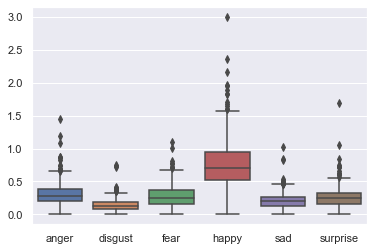

In [38]:
sns.boxplot(data=importance_ranking_tr.T)

<AxesSubplot:>

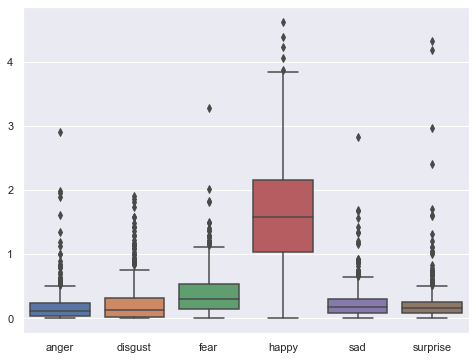

In [15]:
fix,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=importance_ranking_en.T,ax=ax)

In [8]:
groupsAndCountsDfTr.emoticon = groupsAndCountsDfTr.emoticon.str.strip('_')
importance_ranking_tr_transposed = importance_ranking_tr.T
ranking_tr = importance_ranking_tr_transposed.merge(groupsAndCountsDfTr[['emoticon','emoji','cnt']],left_index=True,right_on='emoticon')
ranking_tr["emotion"]=ranking_tr[['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise']].idxmax(axis=1)



In [9]:
ranking_tr.emotion.value_counts()

happy       460
anger        21
fear         18
surprise     14
sad          10
Name: emotion, dtype: int64

In [17]:
groupsAndCountsDfEn.emoticon = groupsAndCountsDfEn.emoticon.str.strip('_')
importance_ranking_en_transposed = importance_ranking_en.T
ranking_en = importance_ranking_en_transposed.merge(groupsAndCountsDfEn[['emoticon','emoji','cnt']],left_index=True,right_on='emoticon')
ranking_en["emotion"]=ranking_en[['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise']].idxmax(axis=1)

In [18]:
#The algorithm in extended form

full_emoss_list = []
happy_emoss = ranking_en.sort_values(by=["happy"],ascending=False)[0:30]
happy_emoss['emotion']="happy"
full_emoss_list.extend(happy_emoss.emoji.to_list())
anger_emoss = ranking_en[ranking_en.emoji.isin(full_emoss_list)==False].sort_values(by=["anger"],ascending=False)[0:30]
anger_emoss['emotion']="anger"
full_emoss_list.extend(anger_emoss.emoji.to_list())
disgust_emoss = ranking_en[ranking_en.emoji.isin(full_emoss_list)==False].sort_values(by=["disgust"],ascending=False)[0:30]
disgust_emoss['emotion']="disgust"
full_emoss_list.extend(disgust_emoss.emoji.to_list())
surprise_emoss = ranking_en[ranking_en.emoji.isin(full_emoss_list)==False].sort_values(by=["surprise"],ascending=False)[0:30]
surprise_emoss['emotion']="surprise"
full_emoss_list.extend(surprise_emoss.emoji.to_list())
fear_emoss = ranking_en[ranking_en.emoji.isin(full_emoss_list)==False].sort_values(by=["fear"],ascending=False)[0:30]
fear_emoss['emotion'] = 'fear'
full_emoss_list.extend(fear_emoss.emoji.to_list())
sad_emoss = ranking_en[ranking_en.emoji.isin(full_emoss_list)==False].sort_values(by=["sad"],ascending=False)[0:30]
sad_emoss['emotion'] = 'sad'

In [19]:
tmpDf = groupsAndCountsDfEn[groupsAndCountsDfEn.emoticon.isin(cofreqs_En[cofreqs_En.sum(axis=1)==0].index.to_list())]
neutral_emoss = tmpDf[tmpDf.group.isin(['Smileys & Emotion','People & Body'])==False][0:30]
selected_emos_en = pd.concat([happy_emoss,sad_emoss,fear_emoss,surprise_emoss,anger_emoss,disgust_emoss,neutral_emoss[['emoticon','cnt','emoji']]])
selected_emos_en.emotion.fillna('neutral',inplace=True)
selected_emos_en.fillna(0,inplace=True)

In [20]:
selected_emos_en.to_excel("/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/selected_emoticons/en/selected_emos_en_90_2.xlsx",index=None)

### Emoticon selection, we'll see how it goes
#### How do we select emoticons?

In [10]:
#Turkish selection
full_emoss = []
happy_emoss = ranking_tr.sort_values(by=["happy"],ascending=False)[0:30].emoji.to_list()
full_emoss.extend(happy_emoss)
anger_emoss = ranking_tr[ranking_tr.emoji.isin(full_emoss)==False].sort_values(by=["anger"],ascending=False)[0:30].emoji.to_list()
full_emoss.extend(anger_emoss)


disgust_emoss = ranking_tr[ranking_tr.emoji.isin(full_emoss)==False].sort_values(by=["disgust"],ascending=False)[0:30].emoji.to_list()

full_emoss.extend(disgust_emoss)

surprise_emoss = ranking_tr[ranking_tr.emoji.isin(full_emoss)==False].sort_values(by=["surprise"],ascending=False)[0:30].emoji.to_list()

full_emoss.extend(surprise_emoss)

fear_emoss = ranking_tr[ranking_tr.emoji.isin(full_emoss)==False].sort_values(by=["fear"],ascending=False)[0:30].emoji.to_list()

full_emoss.extend(fear_emoss)

sad_emoss = ranking_tr[ranking_tr.emoji.isin(full_emoss)==False].sort_values(by=["sad"],ascending=False)[0:30].emoji.to_list()



In [13]:
#There are a lot of unrelated emojis here
pd.DataFrame({"disgust":disgust_emoss,"happy":happy_emoss,"sad":sad_emoss,"anger":anger_emoss,"fear":fear_emoss,"surprise":surprise_emoss})

,disgust,happy,sad,anger,fear,surprise
0,💦,💙,😞,📋,🐍,🙂
1,🐞,😊,👓,😡,🤲🏻,💶
2,🥑,🔥,👦🏻,🤬,🎬,👨‍⚕️
3,🌾,🕯️,🏹,😠,🍿,🚛
4,🐕,💜,👨🏻,😤,😄,🔮
5,🤢,🏟️,♥️,😒,✋,🤳
6,🍅,💪,🙆‍♀️,‼️,🤦🏻‍♀️,⏲️
7,🥥,👏🏽,💔,🤣,💪🏿,😭
8,🐟,❤️,💛,👏🏻,💯,💅🏻
9,🐾,🎉,🍧,⤵️,👌🏻,💌
